In [ ]:
cd /content/drive/My Drive/Colab Notebooks/ImageProcessing_Assignment.zip (Unzipped Files)/assignment

/content/drive/My Drive/Colab Notebooks/ImageProcessing_Assignment.zip (Unzipped Files)/assignment


In [ ]:
import numpy as np
from scipy.ndimage import rotate
import os
from PIL import Image
import math
import cv2
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import correlate, convolve
from exGenerator import *
matricola = '1747042'

INPUT IMAGE

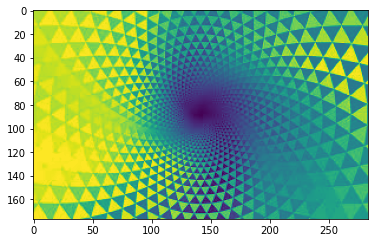

In [ ]:
im1, im2 = ex12(matricola)
plt.imshow(im2)

RESIDUAL - ESTIMATE CONTENT LOSS

(<matplotlib.image.AxesImage at 0x7fb6abaead90>,
 Text(0.5, 1.0, 'Residual - Estimate content loss'))

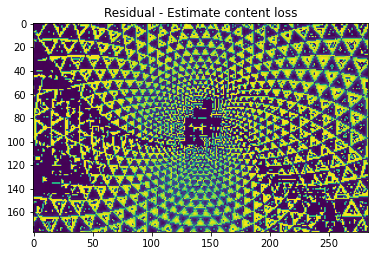

In [ ]:
gaussImg = scipy.ndimage.gaussian_filter(im2, 1.4)
residue = im2 - gaussImg
plt.imshow(residue), plt.title("Residual - Estimate content loss")

METHOD 1 OF DOWNSAMPLING: NAIVE

---



In [ ]:
def naive(img):
  ds = []
  for rowIndex in range(1, np.size(img, 0), 2):
    dsRow = []
    for colIndex in range(1, np.size(img, 1), 2):
      dsRow.append(img[rowIndex][colIndex])
    ds.append(dsRow)
  return ds

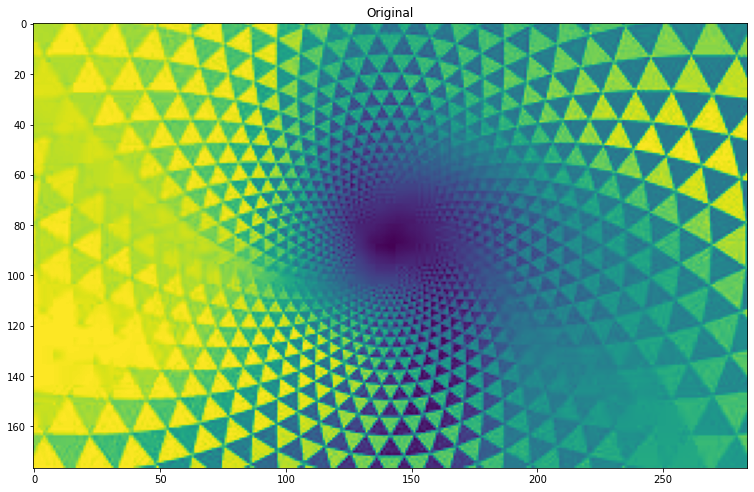

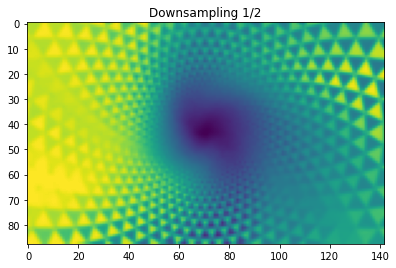

In [ ]:
dsImg1 = naive(gaussImg)

plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
plt.imshow(im2), plt.title("Original")

plt.figure(figsize=(6.4, 4.8), constrained_layout=False)
plt.imshow(dsImg1), plt.title("Downsampling 1/2")

plt.show()

METHOD 2 OF DOWNSAMPLING: BOX FILTER

---


In [ ]:
def copyof(img):
  copyOfImg = np.zeros(np.shape(img))
  for x in range(np.size(img,0)):
    for y in range(np.size(img,1)):
      copyOfImg[x,y] = img[x][y]
  return copyOfImg

def box(img):
  copyOfImg = copyof(img)
  ds = []
  for rowIndex in range(1, np.size(copyOfImg, 0), 2):
    dsRow = []
    for colIndex in range(1, np.size(copyOfImg, 1), 2):
      dsRow.append((copyOfImg[rowIndex][colIndex] 
                    + copyOfImg[rowIndex-1][colIndex] 
                    + copyOfImg[rowIndex][colIndex-1] 
                    + copyOfImg[rowIndex-1][colIndex-1])/4)
    ds.append(dsRow)
  return ds

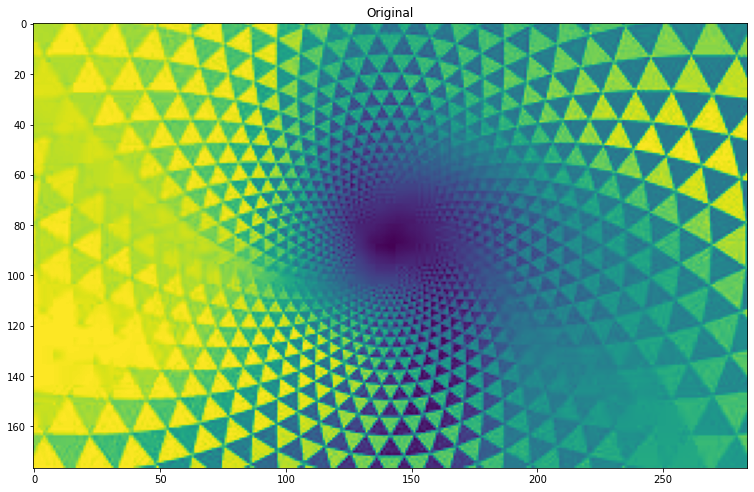

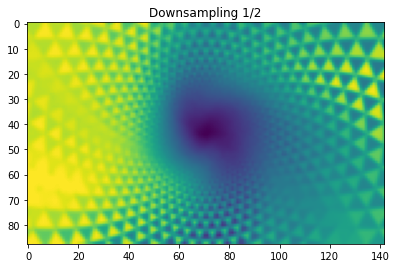

In [ ]:
dsImg2 = box(gaussImg)

plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
plt.imshow(im2), plt.title("Original")

plt.figure(figsize=(6.4, 4.8), constrained_layout=False)
plt.imshow(dsImg2), plt.title("Downsampling 1/2")

plt.show()

COMPARISON

---



Are downsampling the same? False


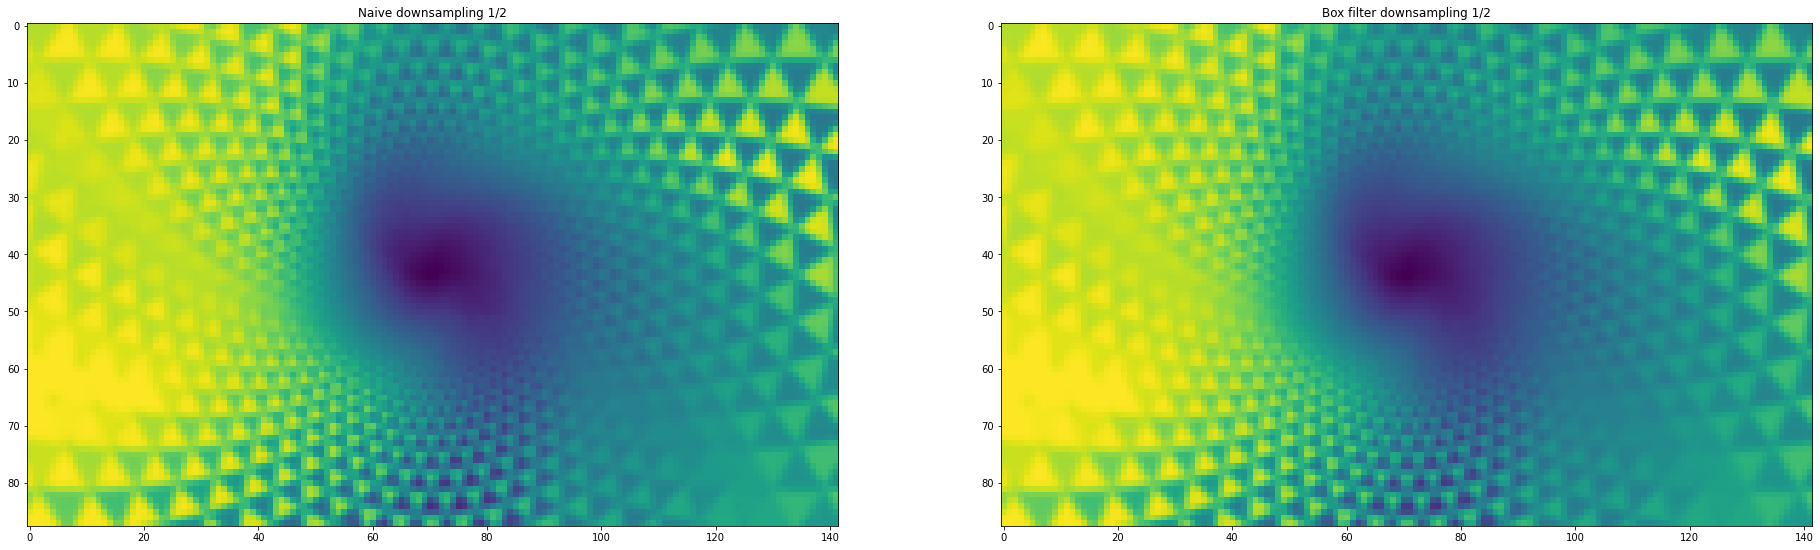

In [ ]:
print("Are downsampling the same?", dsImg1 == dsImg2)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(121),plt.imshow(dsImg1), plt.title("Naive downsampling 1/2")
plt.subplot(122), plt.imshow(dsImg2), plt.title("Box filter downsampling 1/2")

plt.show()